In [126]:
import sys
sys.path.append('../../../')
import helper

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import inspect

In [133]:
def f(x, w):
    N = len(w) // 2
    signal = np.zeros_like(x)
    
    for k in range(N):
        if k == 0:
            signal += w[k] * np.cos(2 * np.pi * k * x)
        else:
            signal += w[k] * np.cos(2 * np.pi * k * x) + w[k + N] * np.sin(2 * np.pi * k * x)
    
    return signal

result_name = '1'
params_dataset = {
    "f_label": inspect.getsource(f),
    "density": 8000,
    "dots_count": 2000,
    "radius": 0.03,
    "dist": 1,
    "w": [1, 0.5, 0.5, 0.8, 0.3, 0.1],
    "test_count": 10,
}

X = np.linspace(-params_dataset["dist"], params_dataset["dist"], params_dataset["density"])
Y = np.array([f(x, np.array(params_dataset["w"], dtype=float)) for x in X])

datasets = [0] * params_dataset["test_count"]

for k in tqdm(range(params_dataset["test_count"])):
    datasets[k] = helper.Generator.generate_2d(X, Y, params_dataset["dots_count"], params_dataset["radius"])


100%|██████████| 10/10 [00:34<00:00,  3.43s/it]


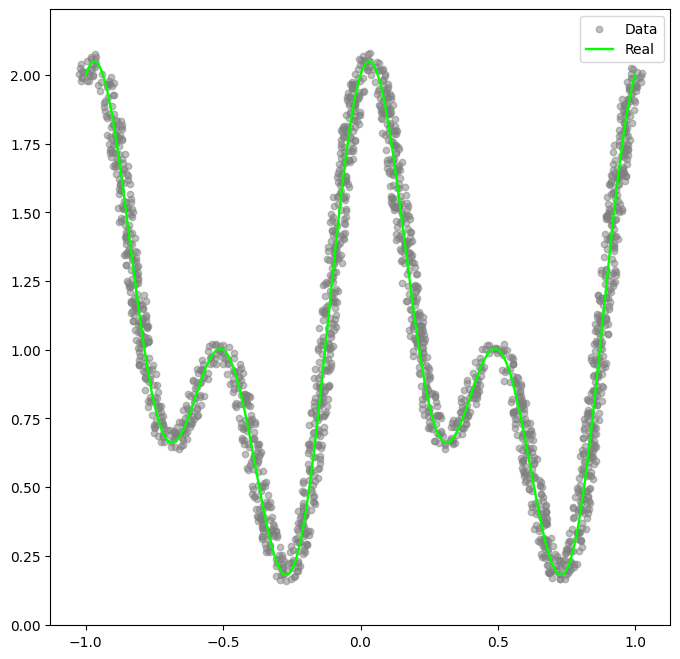

In [132]:
helper.print_generated(X, Y, datasets[0])

In [129]:
helper.save_datasets(X, Y, datasets, 'temp')
helper.add_dataset(result_name, params_dataset, 'temp')